In [92]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch.utils.data import DataLoader, TensorDataset

In [93]:
df = pd.read_csv(r"C:\Users\hdgn5\OneDrive\Masaüstü\pytorch fundementals\ANN\Datasets\cancer.csv")

In [94]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [95]:
if "Unnamed: 32" in df.columns :
    df = df.drop(columns=["Unnamed: 32"])

if "id" in df.columns :
    df = df.drop(columns=["id"])

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [96]:
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])

In [97]:
x = df.drop("diagnosis" , axis=1).values
y = df["diagnosis"]

In [98]:
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [100]:
# y'leri numpy array'e çevir
y_train = y_train.values if hasattr(y_train, "values") else y_train
y_test = y_test.values if hasattr(y_test, "values") else y_test

In [101]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [102]:
train_dataset = TensorDataset(X_train , y_train)
test_dataset = TensorDataset(X_test,y_test)

In [103]:
train_loader = DataLoader(train_dataset , batch_size =32 , shuffle = True)
test_loadet = DataLoader(test_dataset , batch_size =32)

In [104]:
class ANN(nn.Module):
    def __init__(self, input_size , output_size = 1, dp=0.3):
        super(ANN ,self).__init__()

        def linear_block(in_features , out_features , dropout):
            return nn.Sequential(

                nn.Linear(in_features , out_features),
                nn.BatchNorm1d(out_features),
                nn.LeakyReLU(0.1),
                nn.Dropout(dropout)        
                )
        
        self.model = nn.Sequential(
                linear_block(input_size , 128 , dp),
                linear_block(128,64,dp),
                linear_block(64,32,dp),
                nn.Linear(32,output_size)
            )

        for m in self.model:
            if isinstance(m,nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)
        
    def forward(self,x):
        return self.model(x)

In [105]:
model = ANN(input_size=X_train.shape[1])

In [106]:
crietion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters() , lr =0.01 , weight_decay= 1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer , mode="min" , factor =0.5 , patience =5)

In [107]:
from torchinfo import summary

summary(
    model, 
    input_size=(128, X_train.shape[1])  # 32 batch size, input feature sayısı
)

Layer (type:depth-idx)                   Output Shape              Param #
ANN                                      [128, 1]                  --
├─Sequential: 1-1                        [128, 1]                  --
│    └─Sequential: 2-1                   [128, 128]                --
│    │    └─Linear: 3-1                  [128, 128]                3,968
│    │    └─BatchNorm1d: 3-2             [128, 128]                256
│    │    └─LeakyReLU: 3-3               [128, 128]                --
│    │    └─Dropout: 3-4                 [128, 128]                --
│    └─Sequential: 2-2                   [128, 64]                 --
│    │    └─Linear: 3-5                  [128, 64]                 8,256
│    │    └─BatchNorm1d: 3-6             [128, 64]                 128
│    │    └─LeakyReLU: 3-7               [128, 64]                 --
│    │    └─Dropout: 3-8                 [128, 64]                 --
│    └─Sequential: 2-3                   [128, 32]                 --
│    │ 

In [108]:
num_epochs = 50
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    # ------------------------
    # 1️⃣ Eğitim Adımı
    # ------------------------
    model.train()  # Dropout ve BatchNorm eğitim moduna geçer
    running_loss = 0.0
    
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()            # Önceki gradyanları sıfırla
        outputs = model(X_batch)         # Forward pass
        loss = crietion(outputs, y_batch)  # Loss hesaplama
        loss.backward()                  # Backward pass
        optimizer.step()                 # Parametre güncelleme
        running_loss += loss.item() * X_batch.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)
    
    # Scheduler güncellemesi (ReduceLROnPlateau)
    scheduler.step(epoch_loss)
    
    # ------------------------
    # 2️⃣ Değerlendirme Adımı
    # ------------------------
    model.eval()  # Dropout kapalı, BatchNorm sabit
    with torch.no_grad():  # Gradient kapalı
        y_pred = model(X_test)
        y_pred_label = (torch.sigmoid(y_pred) >= 0.5).float()  # 0.5 eşik ile sınıflandırma
        accuracy = (y_pred_label == y_test).sum().item() / y_test.size(0)
        test_accuracies.append(accuracy)
    
    # ------------------------
    # Epoch Sonu Bilgisi
    # ------------------------
    print(f"Epoch [{epoch+1}/{num_epochs}] | Loss: {epoch_loss:.4f} | Test Accuracy: {accuracy*100:.2f}%")


Epoch [1/50] | Loss: 0.2540 | Test Accuracy: 96.49%
Epoch [2/50] | Loss: 0.1547 | Test Accuracy: 96.49%
Epoch [3/50] | Loss: 0.1151 | Test Accuracy: 96.49%
Epoch [4/50] | Loss: 0.0974 | Test Accuracy: 96.49%


Epoch [5/50] | Loss: 0.1010 | Test Accuracy: 96.49%
Epoch [6/50] | Loss: 0.0976 | Test Accuracy: 96.49%
Epoch [7/50] | Loss: 0.1226 | Test Accuracy: 96.49%
Epoch [8/50] | Loss: 0.1313 | Test Accuracy: 95.61%
Epoch [9/50] | Loss: 0.1063 | Test Accuracy: 96.49%
Epoch [10/50] | Loss: 0.0955 | Test Accuracy: 95.61%
Epoch [11/50] | Loss: 0.0736 | Test Accuracy: 94.74%
Epoch [12/50] | Loss: 0.0869 | Test Accuracy: 96.49%
Epoch [13/50] | Loss: 0.0924 | Test Accuracy: 94.74%
Epoch [14/50] | Loss: 0.0842 | Test Accuracy: 95.61%
Epoch [15/50] | Loss: 0.1017 | Test Accuracy: 93.86%
Epoch [16/50] | Loss: 0.0985 | Test Accuracy: 96.49%
Epoch [17/50] | Loss: 0.0639 | Test Accuracy: 96.49%
Epoch [18/50] | Loss: 0.1094 | Test Accuracy: 93.86%
Epoch [19/50] | Loss: 0.1154 | Test Accuracy: 97.37%
Epoch [20/50] | Loss: 0.1250 | Test Accuracy: 96.49%
Epoch [21/50] | Loss: 0.1149 | Test Accuracy: 98.25%
Epoch [22/50] | Loss: 0.0717 | Test Accuracy: 96.49%
Epoch [23/50] | Loss: 0.0852 | Test Accuracy: 95.61

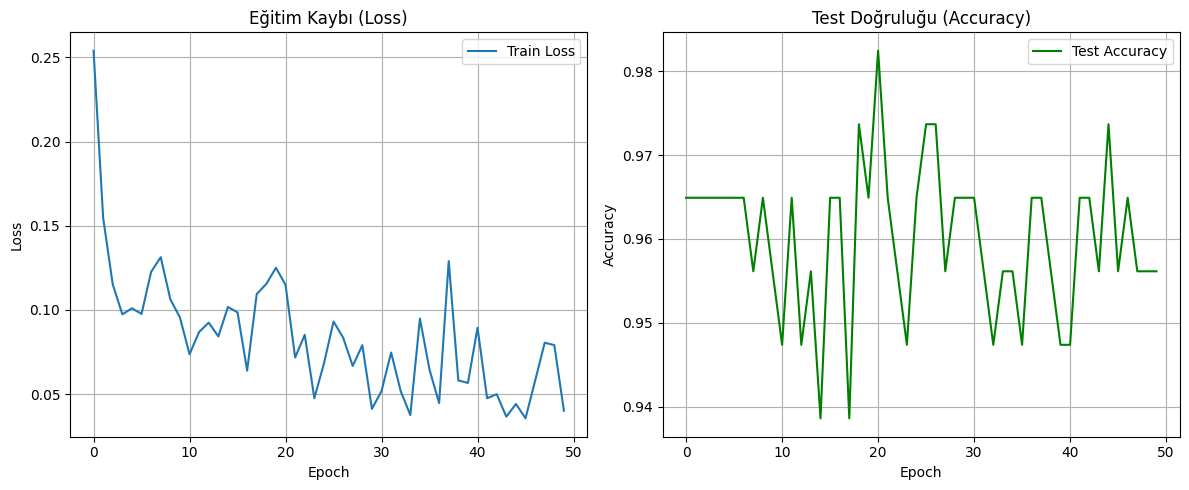

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 📊 Eğitim & Değerlendirme Grafikleri
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 1️⃣ Loss Grafiği
axs[0].plot(train_losses, label="Train Loss")
axs[0].set_title("Eğitim Kaybı (Loss)")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss")
axs[0].legend()
axs[0].grid(True)

# 2️⃣ Accuracy Grafiği
axs[1].plot(test_accuracies, label="Test Accuracy", color="green")
axs[1].set_title("Test Doğruluğu (Accuracy)")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


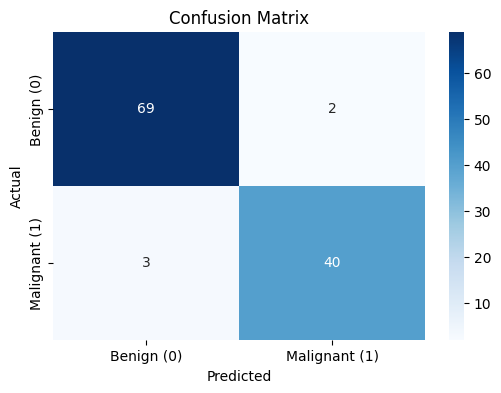

📊 Classification Report:
               precision    recall  f1-score   support

   Benign (0)       0.96      0.97      0.97        71
Malignant (1)       0.95      0.93      0.94        43

     accuracy                           0.96       114
    macro avg       0.96      0.95      0.95       114
 weighted avg       0.96      0.96      0.96       114



In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test.numpy(), y_pred_label.numpy())

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign (0)", "Malignant (1)"], yticklabels=["Benign (0)", "Malignant (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Precision, Recall, F1
print("📊 Classification Report:")
print(classification_report(y_test.numpy(), y_pred_label.numpy(), target_names=["Benign (0)", "Malignant (1)"]))